In [216]:
import numpy as np
import pylab
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mtick
%matplotlib inline
import datetime
from datetime import date
import seaborn as sb
import time
import scipy.stats as stats
from scipy.stats import mstats
from scipy.stats import ttest_ind
from scipy import stats
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("Set2", 10)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
from sklearn.metrics import r2_score, mean_squared_error
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from scipy import stats
from scipy import stats
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.pipeline import Pipeline
from sklearn import metrics


In [ ]:
from fbprophet import Prophet


# Background to "Product"


# Introduction to Sabermetrics



Statistics are the most important part of baseball, the one permanent, indestructible heritage of each passing season, and batting records are the particular gem of all collections of figures, the one most to be desired. Fielding records are known to be grossly inaccurate. Few well informed fans pay much attention to them … Pitching records are nearer accuracy, and since Secretary Heydler has inaugurated his admirable system of earned runs, they are more accurate than ever. But batting records are the most easily kept and readily interpreted of them all.

F.C. Lane was the editor-in-chief of Baseball Magazine, one of the first monthly baseball publications, from 1912 until 1938. Lane is also considered by many to be the first sabermetrician. In 2012, the Society of American Baseball Research—SABR, the root of the word “sabermetrics”—posthumously bestowed upon him the Henry Chadwick Award, established “to honor those researchers, historians, analysts and statisticians whose work has most contributed to our understanding of the game and its history.”

For all the progress since “Why the System of Batting Averages Should Be Changed,” Lane's assessment of the relative state of batting, fielding, and pitching analysis still rings true today. Batting statistics are the most accurate—least debated, certainly—of the set. Pitching and defense—and the question of how to separate the two—remain somewhere between murky and incomprehensible.

Every major league team has established an analytics department, in some form. Players are forced to abandon the approaches learned from old-school coaches of their youths and adapt to new philosophies—like the Moneyball patience ethos or the radical defensive shifts employed by teams like the Rays now. Formerly alien concepts like “run expectancy” are displayed on scoreboards and applications like ESPN's Gamecast—and yes, Jeff Francoeur, so is on-base percentage.

The integration of sabermetrics into front offices was inevitable. Big Data has taken over the business world, from which more and more front office employees (like Tampa Bay Rays general manager Andrew Friedman) trace their origins. These business types don't just acknowledge the value of data in developing ideas. They also acknowledge the value of protecting this data.

Here, in this question, lies the foundation of sabermetric thought. Baseball demands numbers. No fandom looks to its statistical history with more frequency or reverence than baseball's, and no sport has a statistical record as clean or as robust as baseball's. Data demands analysis, and thus the early statistics like batting average and earned run average were born. Lane's question is specific, but it alludes to deeper, more primal concerns: Do our measurements describe what happens on the field? Are we closer to understanding how baseball teams score runs, get outs, and win games?

Batting average makes enough sense on its surface. The batter's goal is to get a hit, therefore measuring how often he does so should describe his quality. But this idea collapses once we take a closer look at how run scoring actually occurs. The hitter's goal is twofold: to reach base himself—whether via a hit, walk, hit by pitch, or anything else—and to move runners, including himself, along the path to home plate. As such, the great comparative value of the home run to the triple, the triple to the double, and the double to the single becomes clear. Calling every hit a hit is as silly as calling every coin a coin.

The great sabermetricians—the researchers whose findings allowed fans and teams alike to make great strides in understanding how baseball works—have all been people with an intense curiosity about how the world works. Most people with this kind of curiosity focus it on worldly subjects like science or profitable ones like the stock market. A select few choose, for some reason, baseball.


Any push for those outside the establishment to understand how baseball works—how and why the wins and losses fans, players and executives stress over and pass down as memories actually happen—has thus been forced to come from outside.

# Reforming Old Methods

Batting average is one of the simplest calculations in baseball. Simply divide a player’s hits by his at-bats to get a percentage. That percentage measures how frequently a player picks up hits — or, ideally, measures a player’s skill at producing hits.

Batting average has two primary flaws that we’ll address in turn. First, batting average ignores a segment of offensive actions just because they aren’t “hits,” and 100 years ago, someone decided a hit and a walk were fundamentally different.

But in reality, the difference is among players with similar batting averages but much different walk rates. If you come to the plate 450 times and get 150 hits and no walks, you have a .333 batting average and a .333 on-base percentage. If you come to the plate 500 times and get 150 hits and 50 walks, you have a .333 batting average and a .400 on-base percentage. Those are vastly different hitters but batting average isn’t sophisticated enough to account for the difference.

In baseball, we care about run scoring (and prevention) and so when looking at offensive statistics, we want to find statistics that tell you something about how much a player contributes to the run scoring process. Batting average leaves out walks and walks play a major role in run scoring.

The second major flaw is that batting average treats every hit equally even though certain hits are more valuable than others. Batting average treats a single and a double like the same thing, even though a hitter who only hit doubles would help his team score a lot more runs than a hitter who only hit singles. Again, we care about a player’s contribution to run scoring and if you treat everything equally you’re not getting a very accurate measure of those contributions.

Which leads us to pose the question, what does batting average bring to the table? When thinking about a statistic, you need to consider what question it answers and if you want to know the answer to that question at all. Batting average tells you how many hits a player gets per at bat.

The system of keeping batting averages needs a complete overhauling. At present this system merely gives the comparative number of times a player makes a hit without paying any attention to the importance of that hit. Home runs and scratch singles are all bulged together on the same footing, when everybody knows that one is vastly more important than the other. The result is that the records are grossly misleading.
# The Shift from BA (Batting Average) to OBP (On Base Percentage)

The shift from considering conventional stats such as Batting Average and placing on emphasis on other, more creative statistics was made famous by Oakland A’s general manager Billy Beane and is illustrated in a novel by Micheal Lewis entitled Moneyball. The Moneyball theory places no emphasis on the body of the athlete or the physical tools that the athlete possess’ (Lewis, 2003). This theory illustrates the simplicity of baseball by asking two questions: Does this player get on base? and Can he hit? According to Lewis (2003), Billy Beane (the inspiration of Moneyball) decided to base his drafting of position players/hitters on certain statistics. His main two statistics included on-base percentage (OBP) and slugging percentage. These two stats combined to form a new statistic called on-base plus slugging (OPS). 

Unlike batting average, on-base percentage doesn't ignore working the count to earn a walk, stepping into an inside pitch or being such a terrifying hitter that one gets pitched around and/or intentionally walked often. There are four players with more than 2,000 career walks: Barry Bonds, Rickey Henderson, Babe Ruth and Ted Williams. And we're supposed to ignore that and concentrate on batting average? In its purest form, OBP is basically measuring the amount of times a hitter does not make an out. With only 27 precious outs in a regulation game, this stat is paramount. That this isn't mainstreamed as more important than batting average makes very little sense to me."

Another differing aspect in Beane’s approach was his lack of emphasis on power (Lewis, 2003). Therefore, Beane believed that power could be developed, but patience at the plate and the ability to get on base could not. Moreover, Beane believed in the notion to select college players who are experienced on a different level than the high school “phenom” who needs to be developed into a player. Beane’s theory was created based on the works of a sabermetrician named Bill James. 


# Our model
When putting together a lineup, managers must decide the best order in which the team has the best chance of winning. To win the game one must score more runs than the opposing team. This thought provokes the question as to why such great importance is placed on batting averages? “People are in the habit of listing their teams offensive statistics according to batting averages rather than in order of runs scored” (James, 1984 p.10)

Most famously, the Moneyball A's spearheaded a renewed and invigorated approach to answering Lane's question of the improved batting average. The advent of on-base percentage was the most visible result. Even OPS—on-base percentage plus slugging percentage—became so mainstream as to appear on Topps cards in 2004. Eventually, statistics like Weighted On Base Average (wOBA) and True Average (TAv; formerly Equivalent Average/EqA) that gave separate, historically derived weights to singles, doubles, triples, home runs, and other events emerged and now headline the offensive statistics of FanGraphs and Baseball Prospectus, respectively. These solutions to Lane's problem—the most advanced all-encompassing batting statistics—are remarkably similar in spirit and in function to Lane's work in Baseball Magazine.

What I want to convey through this models is the superior or at least equally efficient relationship OBP and other statistics have with a team's winning percentage. Once we have proven statistically that OBP is a statsitic worth considering when assembling a team I have created an index that contains all the players in the league from 1980, their respective OBP and how it relates to their salary in order for a team to budget itself the highest winning team it can afford.

# Data Cleaning and Mining

We will begin our presentation by proving statistically that the OBP of a player is one of the most valuable statsitcs a player can have in order to propel his team to maximize their success. Instead of focusing on teh players' indivudal accomplishments and skills set, OBP is a useful way of measuring a players' complete offensive contribution to his respective team. Through a series of test we will prove that a teams' collective OBP helps propel them to fulfill their potenital and win as amny games as possible and it is in the teams' managements best interest to acquire as many players with high OBP for a low price.

First we will begin by tailoring the Lahman's basebal data set to include OBP (On Base Percentage), Slugging Percentage and OPS and Winning Percentage for every team since 1980.

This will include uploading various statistical recordings from the Lahman's data set and merging them. 

The following dataset is a collection of the offensive statistics for every baseball player who is registed in the Lahmann's Baseball Database , a database which contains all MLB players statistics from 1879 to 2015. I focused mainly on a number of sets that are part of this bigger database. Most specifically, I focused on collective team statistics including all their offensive statistics; both the sum and the average when applicable. These statistics were compared to the teams' success/winning percentage; the number of the games won divided by the number of games played overall in a given season.
http://www.seanlahman.com/baseball-archive/statistics/

# Player Database

In order to create the most economically efficient team, I'd like to create a player index that will display the most valuable players available for a given team. We will create a ratio feature that will provide a number system that delineates the chepaest player with the highest OBP (since 1980) and another index that provides the same ratio for a players BA. Teams' office managers can use such a ratio in order to help them reach their desired winning percentage by filling up their lineup with high-OBP profile players for what will hopefull be a minimul amount.

In [34]:
SaberID =pd.read_csv('/Users/ezzan/Downloads/FanGraphs Leaderboard (1).csv')
SaberID.head(10)

,Season,Name,Team,PA,BB%,K%,BB/K,AVG,OBP,SLG,...,Spd,BABIP,UBR,wGDP,wSB,wRC,wRAA,wOBA,wRC+,playerid
0,2002,Barry Bonds,Giants,612,32.4 %,7.7 %,4.21,0.370,0.582,0.799,...,3.9,0.330,-4.4,2.3,0.9,184,110.0,0.544,244,1109
1,2004,Barry Bonds,Giants,617,37.6 %,6.6 %,5.66,0.362,0.609,0.812,...,4.0,0.310,-2.9,2.0,0.6,184,108.0,0.537,233,1109
2,2001,Barry Bonds,Giants,664,26.7 %,14.0 %,1.90,0.328,0.515,0.863,...,4.1,0.266,NaN,NaN,1.3,200,117.7,0.537,235,1109
3,2003,Barry Bonds,Giants,550,26.9 %,10.5 %,2.55,0.341,0.529,0.749,...,3.9,0.304,-2.0,1.4,1.3,148,80.5,0.503,212,1109
4,1994,Frank Thomas,White Sox,517,21.1 %,11.8 %,1.79,0.353,0.487,0.729,...,2.6,0.336,NaN,NaN,-0.9,138,72.4,0.499,205,255
5,1998,Mark McGwire,Cardinals,681,23.8 %,22.8 %,1.05,0.299,0.470,0.752,...,1.6,0.285,NaN,NaN,0.2,176,91.7,0.492,205,1008559
6,1996,Mark McGwire,Athletics,548,21.2 %,20.4 %,1.04,0.312,0.467,0.730,...,1.2,0.308,NaN,NaN,-0.2,142,71.8,0.489,190,1008559
7,1997,Larry Walker,Rockies,664,11.7 %,13.6 %,0.87,0.366,0.452,0.720,...,6.5,0.367,NaN,NaN,3.2,168,86.1,0.488,177,455
8,1994,Jeff Bagwell,Astros,479,13.6 %,13.6 %,1.00,0.368,0.451,0.750,...,5.6,0.353,NaN,NaN,1.3,123,62.6,0.488,205,547
9,1999,Larry Walker,Rockies,513,11.1 %,10.1 %,1.10,0.379,0.458,0.710,...,5.6,0.363,NaN,NaN,0.4,131,64.0,0.485,167,455


# Other Databases and Mining

In [3]:
Batting = pd.read_csv('/Users/ezzan/Downloads/python_drills/Batting.csv', sep=',', header=0)
Pitching = pd.read_csv('/Users/ezzan/Downloads/python_drills/Pitching.csv')
Salary= pd.read_csv('/Users/ezzan/Downloads/python_drills/Salaries.csv', sep=',', header=0)
Team = pd.read_csv('/Users/ezzan/Downloads/python_drills/Teams.csv')
AllStar= pd.read_csv('/Users/ezzan/Downloads/python_drills/AllstarFull.csv')
Fielding =pd.read_csv('/Users/ezzan/Downloads/python_drills/Fielding.csv', sep=',', header=0)
Full =pd.read_csv('/Users/ezzan/Downloads/python_drills/Master.csv')
Appearances = pd.read_csv('/Users/ezzan/Downloads/python_drills/Appearances.csv')
Awards = pd.read_csv('/Users/ezzan/Downloads/python_drills/AwardsPlayers.csv')
Steriod = pd.read_csv('/Users/ezzan/Downloads/python_drills/steriodslist.csv')
FieldingOF = pd.read_csv('/Users/ezzan/Downloads/python_drills/FieldingOF.csv')
Saber =pd.read_csv('/Users/ezzan/Downloads/FanGraphs Leaderboard (1).csv')
Saber2 =pd.read_csv('/Users/ezzan/Downloads/sportsref_download (1).csv')


In [4]:
#In order to make sure all the mergings go smoothly, we will want to make sure that the players' names are under one uniform data set name "playerID1."
Batting['playerID1'] = Batting.playerID
Full['playerID1'] = Full.playerID
Fielding['playerID1'] = Fielding.playerID
Salary['playerID1'] = Salary.playerID
Batting = Batting.loc[lambda Batting: Batting['yearID'] > 1980, :]
Fielding = Fielding.loc[lambda Fielding: Fielding['yearID'] > 1980, :]
Batting1 = Batting[['playerID1', 'yearID', 'teamID', 'AB', 'G','H','HR','RBI','BB','2B','3B', 'HBP','SH','SF']]
Batting11 = Batting[['playerID1','AB', 'G','H','HR','RBI','BB','2B','3B', 'HBP','SH','SF']]
Fielding11 = Fielding[['playerID1','GS','InnOuts', 'PO', 'A', 'E', 'DP', 'PB', 'WP', 'SB', 'CS', 'ZR']]
Salary1 = Salary[['playerID1', 'yearID','teamID','salary']]
Names = Full[['playerID1', 'nameFirst', 'nameLast']]
Fielding1 = Fielding[['playerID1', 'POS', 'G']]
Postions = Appearances[['playerID','yearID','teamID','G_p', 'G_c','G_1b','G_2b','G_3b','G_ss','G_lf','G_cf','G_of']]
Fielding11 = Fielding11.dropna()
Batting11 = Batting11.dropna()

In [5]:
MasterID0 = pd.merge(Batting1, Salary1)
MasterID01 = pd.merge( MasterID0, Full)
MasterID02 = pd.merge(MasterID01, Postions)
MasterID1 = pd.merge( MasterID02, Fielding1)

MasterID1["BA"]=MasterID1.H/MasterID1.AB
single = MasterID1.H-MasterID1["3B"]-MasterID1["2B"]
MasterID1["OBP"]= (MasterID1.H + MasterID1.BB + MasterID1.HBP ) / (MasterID1.AB + MasterID1.BB + MasterID1.HBP + MasterID1.SF)
MasterID1["slug"]=(single + 2*MasterID1["2B"] + MasterID1["3B"]*3 + 4*MasterID1.HR)/MasterID1.AB
MasterID1["OPS"] = MasterID1.OBP + MasterID1.slug
#MasterID1 = pd.merge(MasterID, Salary, on='playerID')
MasterID1 = MasterID1.dropna()
MasterID1 = MasterID1.drop_duplicates()
MasterID1['Ratio'] = MasterID1['OBP']/MasterID1['salary']
MasterID1.dropna()
MasterID2 = MasterID1[['playerID','nameFirst', 'nameLast','salary', 'G_p', 'G_c','G_1b','G_2b','G_3b','G_ss','G_lf','G_cf','G_of','G', 'OBP', 'OPS', 'Ratio', ]]

# Consistency of OBP

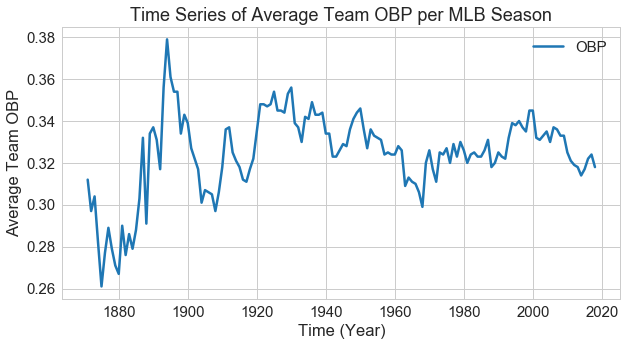

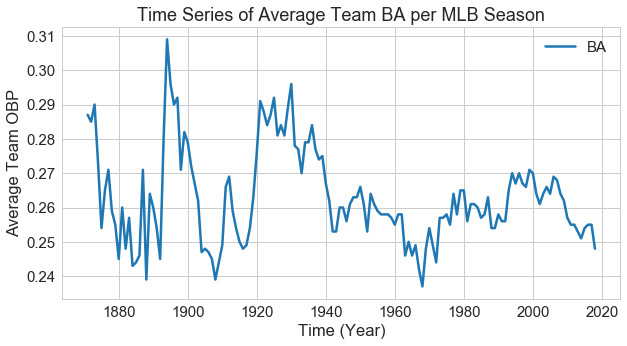

In [6]:
Saber2.index = Saber2['Year']
ts1 = Saber2['OBP']
plt.figure(figsize = (10, 5))
plt.plot(ts1)
plt.title("Time Series of Average Team OBP per MLB Season")
plt.xlabel("Time (Year)")
plt.ylabel("Average Team OBP")
plt.legend(loc = 'best')


Saber2.index = Saber2['Year']
ts2 = Saber2['BA']
plt.figure(figsize = (10,5))
plt.plot(ts2)
plt.title("Time Series of Average Team BA per MLB Season")
plt.xlabel("Time (Year)")
plt.ylabel("Average Team OBP")
plt.legend(loc = 'best')



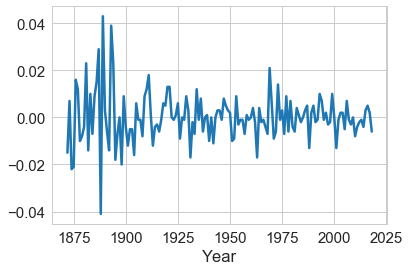

In [7]:
Saber2['diff_1'] = Saber2['OBP'] - Saber2['OBP'].shift(periods=1)
Saber2.diff_1.plot(y='diff_1')
plt.show()

In [8]:
# differenced data
from statsmodels.tsa.stattools import adfuller

x_diff = Saber2['diff_1'].iloc[1:]
result = adfuller(x_diff)
print('\nDifferenced Data:')
print('ADF Statistic %f' % result[0])
print('p-value: %f' % result[1])


Differenced Data:
ADF Statistic -5.668943
p-value: 0.000001


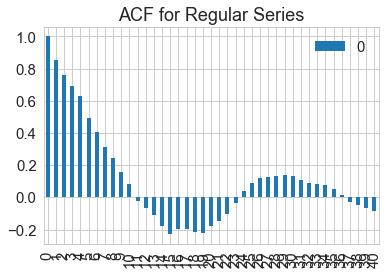

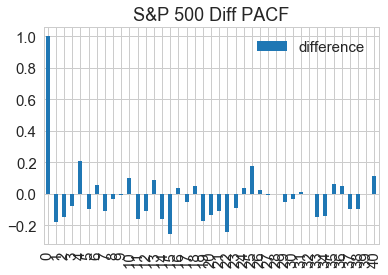

In [9]:
import statsmodels
from statsmodels.tsa.stattools import pacf, acf


x = Saber2['OBP']
x_acf = pd.DataFrame(acf(x))
x_acf.plot(kind='bar')
plt.title('ACF for Regular Series')
plt.show()

x_acf = pd.DataFrame(pacf(x_diff))
x_acf.plot(kind='bar')
plt.title("S&P 500 Diff PACF")
plt.legend(['difference'])

c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.OBP   No. Observations:                  147
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 465.212
Method:                       css-mle   S.D. of innovations              0.010
Date:                Mon, 04 Feb 2019   AIC                           -922.424
Time:                        20:07:23   BIC                           -910.462
Sample:                             1   HQIC                          -917.564
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.173e-05      0.001      0.134      0.894      -0.001       0.001
ar.L1.D.OBP     0.2241      0.265      0.847      0.398      -0.295       0.743
ma.L1.D.OBP    -0.4397      0.240     -1.831    

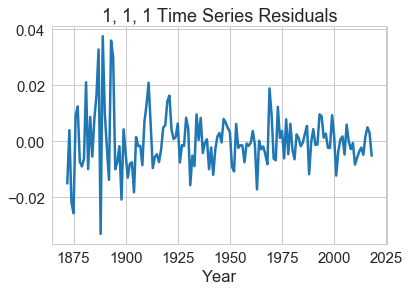

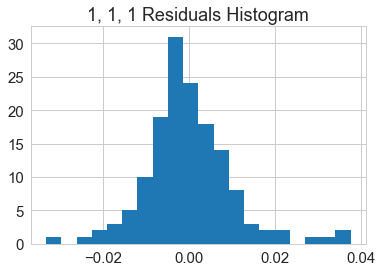

In [67]:
from statsmodels.tsa.arima_model import ARIMA
model_111 = ARIMA(Saber2['OBP'], order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

residuals_111 = pd.DataFrame(model_111_fit.resid)
residuals_111.plot(legend=False)
plt.title('1, 1, 1 Time Series Residuals')

residuals_111.hist(bins=20)
plt.title('1, 1, 1 Residuals Histogram')

plt.show()

# Player Mining Model

# Feature Analysis

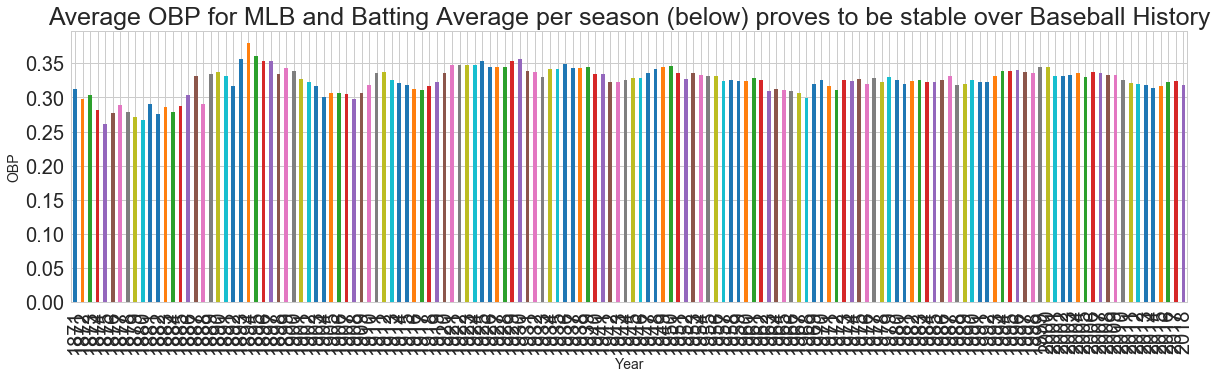

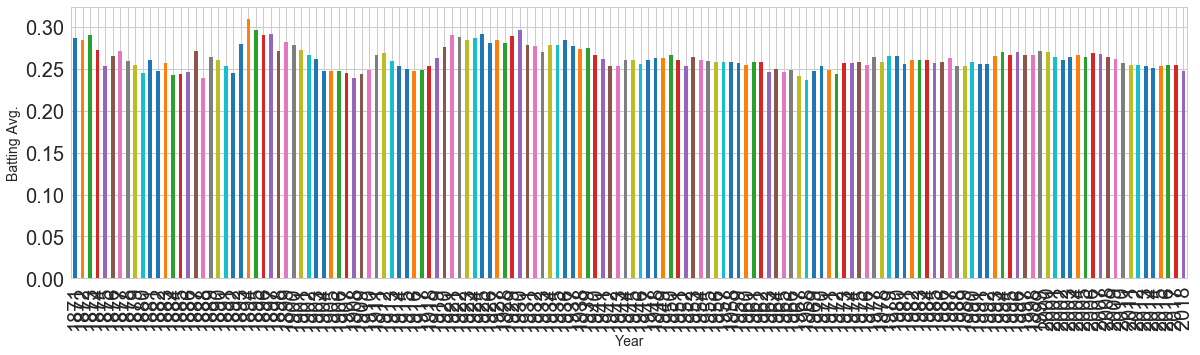

In [15]:
my_plot= Saber2['OBP'].plot(kind='bar',stacked=True,figsize=(20, 5),fontsize = (20))
my_plot.set_title("Average OBP for MLB and Batting Average per season (below) proves to be stable over Baseball History", fontsize = (25))
my_plot.set_xlabel("Year", fontsize = (14))
my_plot.set_ylabel("OBP", fontsize = (14))
plt.show()



my_plot= Saber2['BA'].plot(kind='bar',stacked=True,figsize=(20, 5),fontsize = (20))
#my_plot.set_title("Mean Batting Average per Year proves to be consistent over Baseball History", fontsize = (25))
my_plot.set_xlabel("Year", fontsize = (14))
my_plot.set_ylabel("Batting Avg.", fontsize = (14))
plt.show()

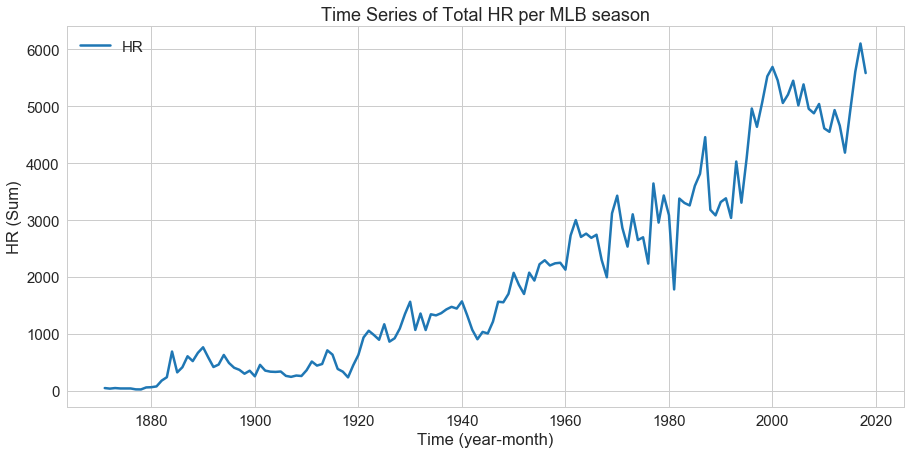

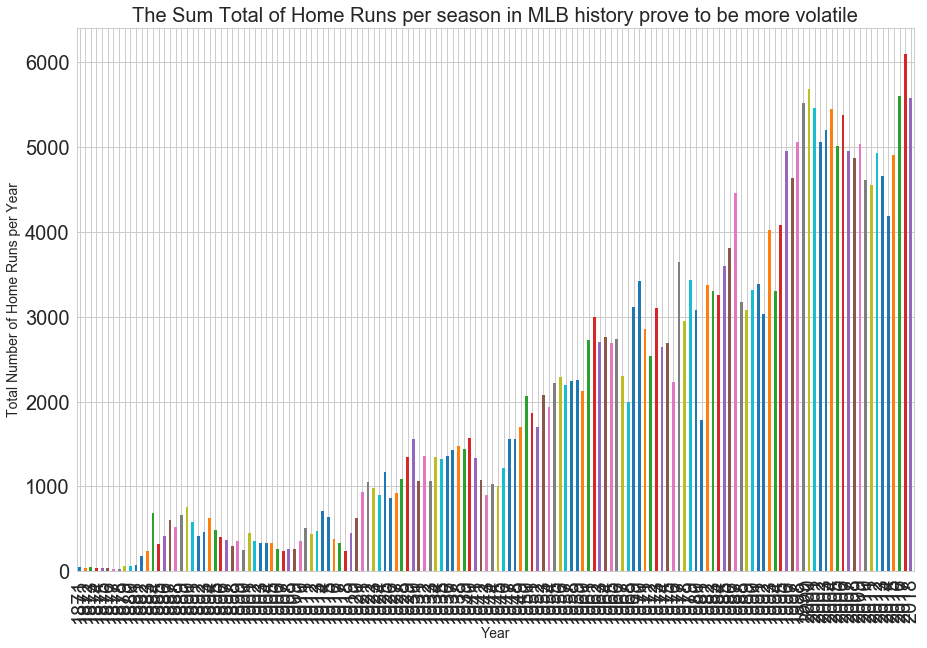

In [17]:
Saber2.index = Saber2['Year']
ts = Saber2['HR']
plt.figure(figsize = (15,7))
plt.plot(ts)
plt.title("Time Series of Total HR per MLB season")
plt.xlabel("Time (year-month)")
plt.ylabel("HR (Sum)")
plt.legend(loc = 'best')
plt.show()


my_plot= Saber2['HR'].plot(kind='bar',stacked=True,figsize=((15,10)),fontsize = (20))
my_plot.set_title("The Sum Total of Home Runs per season in MLB history prove to be more volatile", fontsize = (20))
my_plot.set_xlabel("Year", fontsize = (14))
my_plot.set_ylabel("Total Number of Home Runs per Year", fontsize = (14))
plt.show()

#  A Case for OBP  and its OBP's  effect on Team's Winning Percentage

We will now introduce the Sabermetrics that can be used in order to discover effective and affordable talent. We will custom make these statsitcs from previously existing statistics. These statistics include


OBP = (Hits + Walks + Hit-By-Pitches) / (At-Bats + Walks + Sacrifice Flies + Hit-By Pitches). 


Slugging Percentage =1 x Singles + 2 x Doubles + 3 x Triples + 4 x Home Runs/ At Bats)


OPS  = Slugging Percentage + OBP

In [16]:
Team['rate']= Team['W']/Team['G']
Team["BA"]=Team.H/Team.AB
Team["1B"]=(Team.H-Team["3B"]-Team["2B"])
Team["OBP"]= (Team.H + Team.BB + Team.HBP ) / (Team.AB + Team.BB + Team.HBP + Team.SF)
Team["slug"]=(Team["1B"] + 2*Team["2B"] + Team["3B"]*3 + 4*Team.HR)/Team.AB
Team["OPS"] = Team.OBP + Team.slug
Team1 = Team.groupby(['yearID']).sum()
Team1.reset_index(level=0, inplace=True)
Team1 = Team1[['yearID','HR', 'H']]
Team1= pd.merge(Team1, Team, on='yearID')
Team1 = Team1.dropna()

Team1.head()

,yearID,HR_x,H_x,lgID,teamID,franchID,divID,Rank,G,Ghome,...,PPF,teamIDBR,teamIDlahman45,teamIDretro,rate,BA,1B,OBP,slug,OPS
2325,2000,5693,45246,AL,ANA,ANA,W,3,162,81.0,...,103,ANA,ANA,ANA,0.506173,0.279673,1231,0.352355,0.514392,0.866748
2326,2000,5693,45246,NL,ARI,ARI,W,3,162,81.0,...,103,ARI,ARI,ARI,0.524691,0.265243,1140,0.333387,0.461733,0.795121
2327,2000,5693,45246,NL,ATL,ATL,E,1,162,81.0,...,99,ATL,ATL,ATL,0.586420,0.271452,1190,0.346477,0.461286,0.807763
2328,2000,5693,45246,AL,BAL,BAL,E,4,162,81.0,...,96,BAL,BAL,BAL,0.456790,0.271761,1176,0.340580,0.468192,0.808772
2329,2000,5693,45246,AL,BOS,BOS,E,2,162,81.0,...,103,BOS,BOS,BOS,0.524691,0.266963,1155,0.340547,0.453108,0.793655


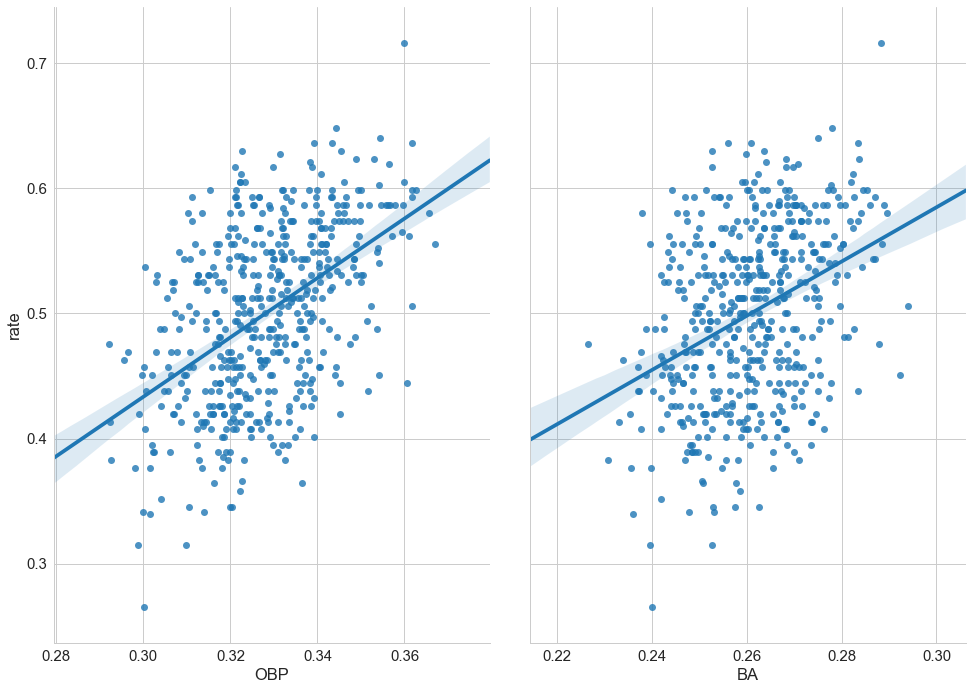

In [451]:

sns.pairplot(Team1, x_vars=['OBP', 'BA'], y_vars='rate', size=10, aspect=0.7, kind='reg')

#### Correlation between Winning Percentage and Teams OBP average

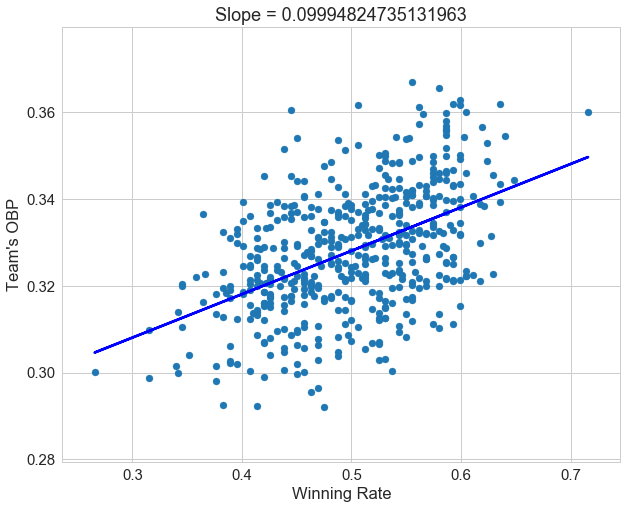

In [17]:
x = np.array(Team1.rate)
y = np.array(Team1.OBP)

# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Winning Rate")
plt.ylabel("Team's OBP")
plt.show()

#### Correlation between Winning Percentage and Teams Average Batting Average

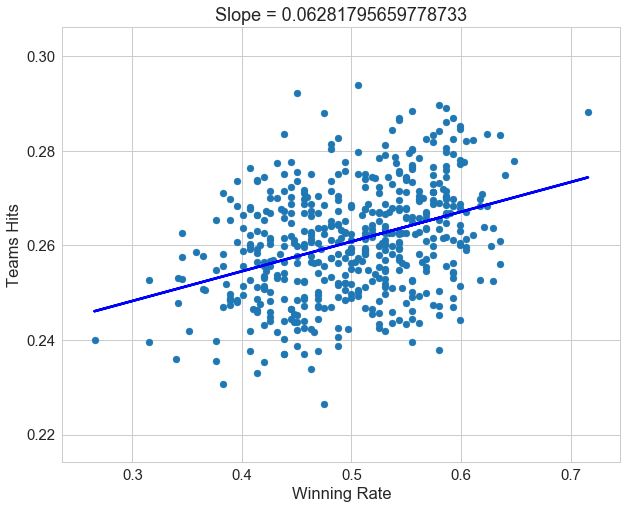

In [455]:
x1 = np.array(Team1.rate)
y1 = np.array(Team1['BA'])
slope, intercept = np.polyfit(x1, y1, 1)
abline_values = [slope * i + intercept for i in x1]
plt.figure(figsize=(10,8))
plt.scatter(x1, y1)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Winning Rate")
plt.ylabel("Teams Hits")
plt.show()

In [24]:
lm1 = smf.ols(formula='rate ~ BA + OBP', data=Team1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     81.56
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           1.95e-31
Time:                        20:21:30   Log-Likelihood:                 703.37
No. Observations:                 510   AIC:                            -1401.
Df Residuals:                     507   BIC:                            -1388.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2518      0.063     -3.985      0.000      -0.376      -0.128
BA            -0.8634      0.423     -2.041      0.042      -1.694      -0.032
OBP            2.9781      0.351      8.483      0.000       2.288       3.668
==============================================================================
Omnibus:                       11.634   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                6.786
Skew:                          -0.085   Prob(JB):                       0.0336
Kurtosis:                       2.461   Cond. No.                         212.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [457]:
from sklearn.linear_model import LinearRegression

feature_cols = ['rate']
X = Team1[feature_cols]
y = Team1.OBP

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print("OBP/Winning Percentage Intercept and Coefficient")
print(lm2.intercept_)
print(lm2.coef_)
print(np.corrcoef(x,y))

feature_cols = ['rate']
X = Team1[feature_cols]
y = Team1.BA

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print('-----------------------')
print("BA/Winning Percentage Intercept and Coefficient")
print(lm2.intercept_)
print(lm2.coef_)

print()

OBP/Winning Percentage Intercept and Coefficient
0.27806902421552776
[0.09994825]
[[1.         0.48703063]
 [0.48703063 1.        ]]
-----------------------
BA/Winning Percentage Intercept and Coefficient
0.2294105749501911
[0.06281796]
[[1.         0.36882379]
 [0.36882379 1.        ]]



In [279]:
X_statsmod = Team1[['BA', 'OBP']]
X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(Team1['rate'], X_statsmod)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.688415
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   rate   No. Observations:                  510
Model:                          Logit   Df Residuals:                      507
Method:                           MLE   Df Model:                            2
Date:                Wed, 30 Jan 2019   Pseudo R-squ.:                0.006826
Time:                        21:23:23   Log-Likelihood:                -351.09
converged:                       True   LL-Null:                       -353.50
                                        LLR p-value:                   0.08954
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
BA            -3.4693     13.877     -0.250      0.803     -30.668      23.730
OBP           11.9653     11.

c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
Team1.drop(['DivWin','WCWin','WSWin','LgWin','lgID'], axis=1, inplace=True)
Team1.drop(['teamID','franchID','divID', 'teamIDretro','yearID','teamIDlahman45','teamIDBR','teamIDlahman45','park','name'], axis=1, inplace=True)

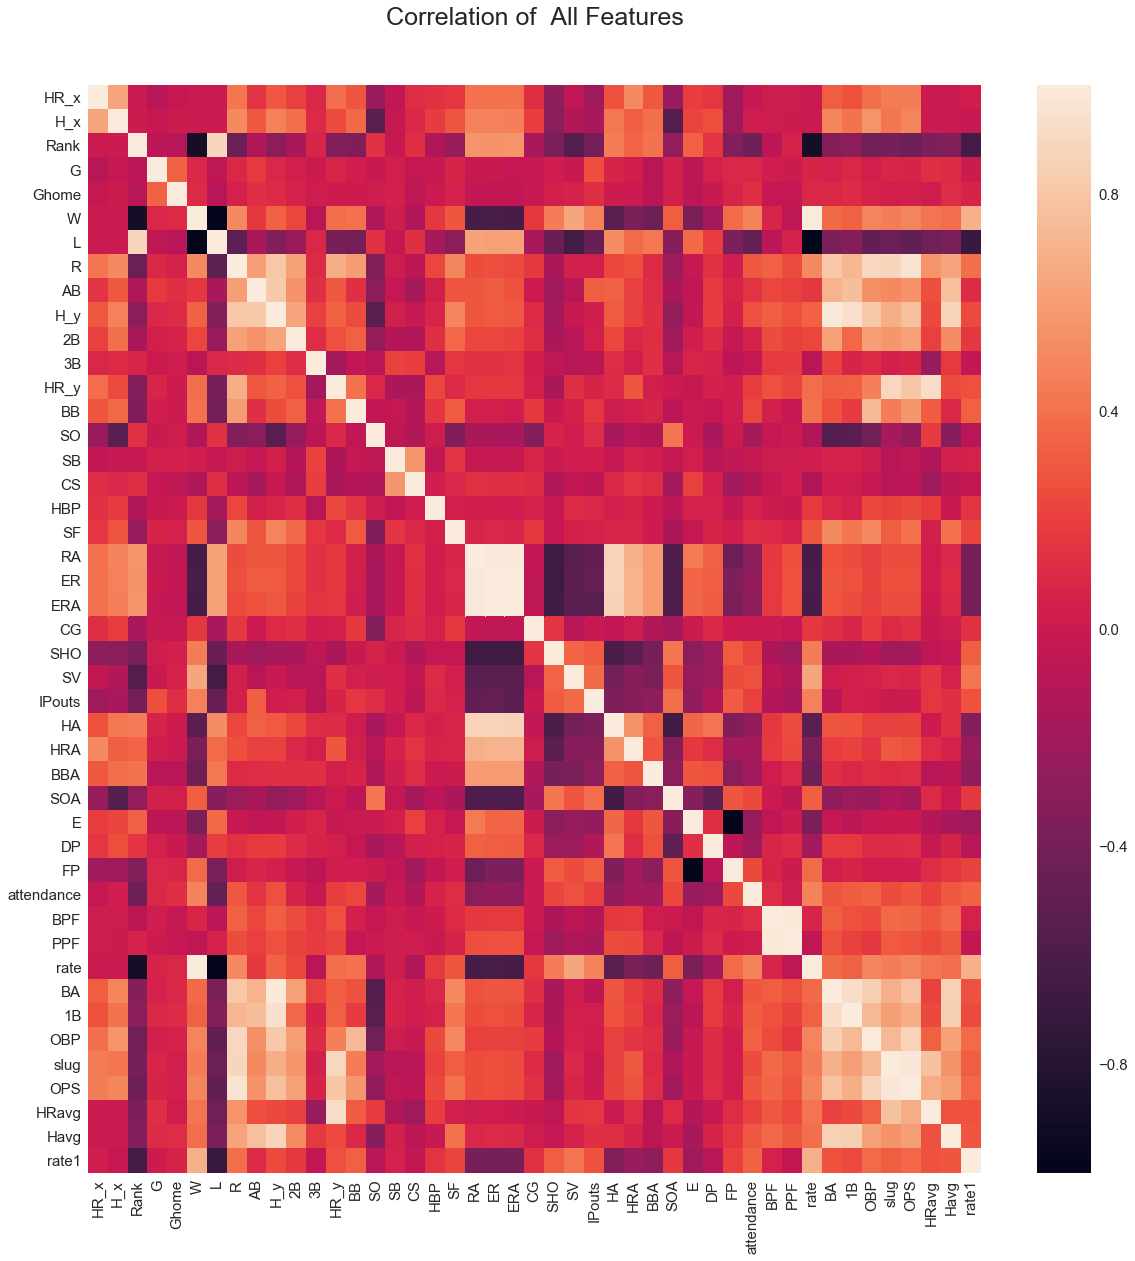

In [458]:
#Team1.drop(['teamID','franchID','divID', 'teamIDretro','yearID','teamIDlahman45','teamIDBR','teamIDlahman45','park','name'], axis=1, inplace=True)
colormap = plt.cm.viridis

plt.figure(figsize=(20,20))
plt.title('Correlation of  All Features', y=1.05, size=25)
uniform_data = Team1.astype(float).corr()
ax = sns.heatmap(uniform_data)
ax
#sns.heatmap(Team1.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


In [69]:
Teamcorr = Team1[['rate','W','L','BA','slug','OBP','OPS']]

,rate,W,L,BA,slug,OBP,OPS
rate,1.000000,0.999901,-0.999850,0.368824,0.453181,0.487031,0.492415
W,0.999901,1.000000,-0.999594,0.369109,0.453590,0.487038,0.492715
L,-0.999850,-0.999594,1.000000,-0.368093,-0.452730,-0.487419,-0.492215
BA,0.368824,0.369109,-0.368093,1.000000,0.689566,0.844100,0.783503
slug,0.453181,0.453590,-0.452730,0.689566,1.000000,0.737387,0.974481
OBP,0.487031,0.487038,-0.487419,0.844100,0.737387,1.000000,0.870193
OPS,0.492415,0.492715,-0.492215,0.783503,0.974481,0.870193,1.000000


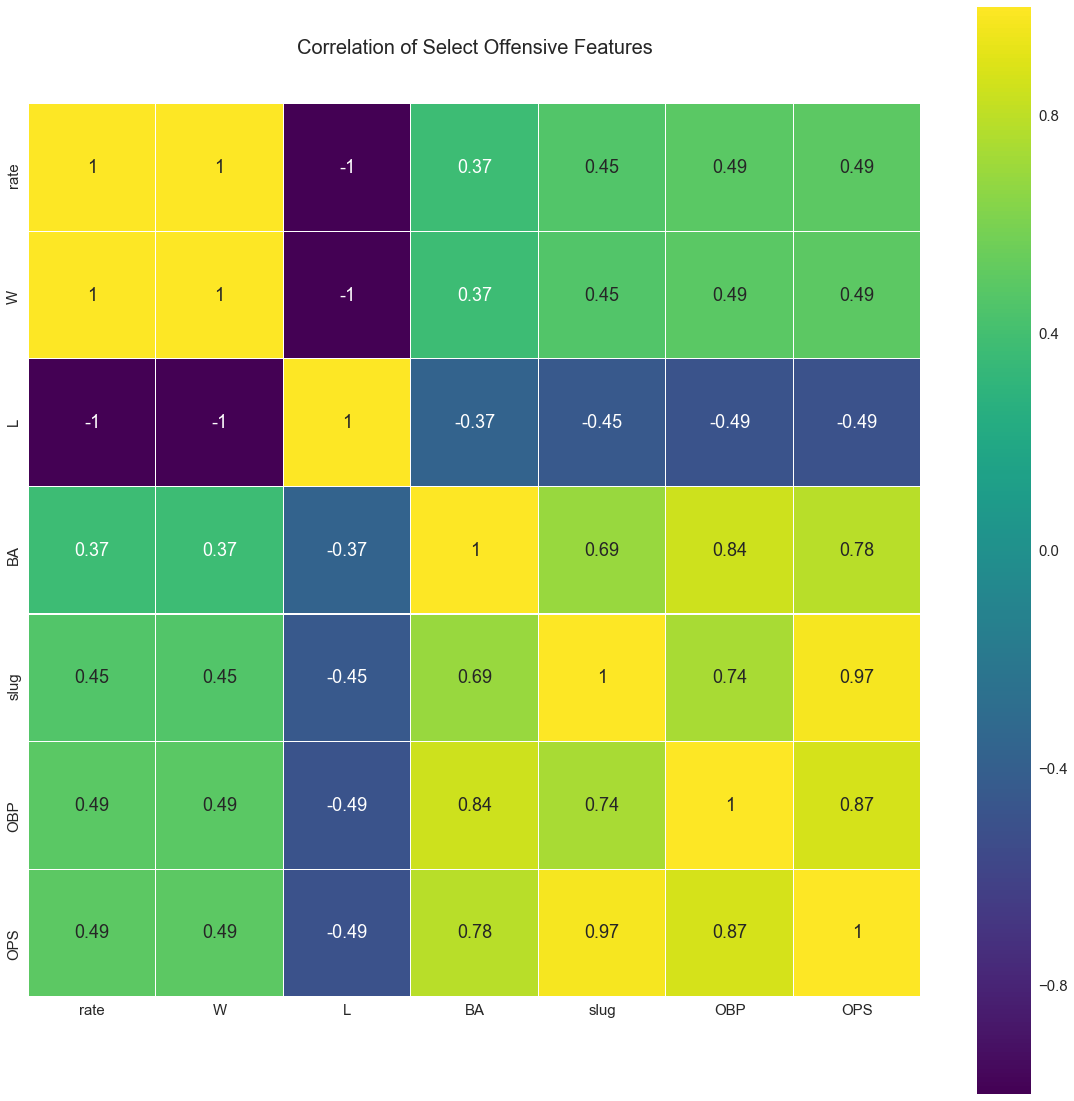

In [70]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Correlation of Select Offensive Features', y=1.05, size=20)
sns.heatmap(Teamcorr.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Teamcorr.corr()

In [31]:
#heatmap = pd.merge(Batting11, Fielding11, on ='playerID1')
#heatmap.drop(['playerID1'], axis=1, inplace=True)
#plt.figure(figsize=(20,20))
#plt.title('Correlation of Features', y=1.05, size=20)
#sns.heatmap(heatmap.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

#heatmap.corr()

# Prediciton Model for the 2000 Season

In [79]:
SaberID = SaberID.loc[lambda SaberID: SaberID['Season'] > 1980, :]
SaberID = SaberID.loc[lambda MasterPlayer: SaberID['Season'] < 2000, :]

In [80]:

SaberID.columns
MasterPlayer = pd.pivot_table(SaberID,index=["Name"],values=['PA', 'BB%', 'K%', 'BB/K', 'AVG', 'OBP', 'SLG', 'OPS',
       'ISO', 'Spd', 'BABIP', 'UBR', 'wGDP', 'wSB', 'wRC', 'wRAA', 'wOBA',
       'wRC+'], columns=["Season"],fill_value=0)


In [81]:
#MasterPlayer = MasterPlayer.replace(0, np.nan)
#how to represent 0 as nulls/mute 
MasterPlayer.head()

AVG                                                  ...   \
Season          1981   1982 1983   1984 1985 1986 1987 1988 1989 1990 ...    
Name                                                                  ...    
Aaron Boone    0.000  0.000  0.0  0.000  0.0  0.0  0.0  0.0  0.0  0.0 ...    
Adrian Beltre  0.000  0.000  0.0  0.000  0.0  0.0  0.0  0.0  0.0  0.0 ...    
Al Bumbry      0.273  0.262  0.0  0.000  0.0  0.0  0.0  0.0  0.0  0.0 ...    
Al Cowens      0.000  0.270  0.0  0.277  0.0  0.0  0.0  0.0  0.0  0.0 ...    
Al Martin      0.000  0.000  0.0  0.000  0.0  0.0  0.0  0.0  0.0  0.0 ...    

               wSB                                               
Season        1990 1991 1992 1993 1994 1995 1996 1997 1998 1999  
Name                                                             
Aaron Boone    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.7  
Adrian Beltre  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.4  
Al Bumbry      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Al Cowens      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Al Martin      0.0  0.0  0.0 -0.4  0.0 -0.9  2.0  0.0  0.0  2.7  

[5 rows x 304 columns]

AttributeError: 'list' object has no attribute 'head'

In [153]:
#accuracy_score(Y_test, Y_pred)
from sklearn.model_selection import TimeSeriesSplit
X = MasterPlayer.drop(['OBP'], 1)
y = [MasterPlayer['OBP'] == 1999]
tscv = TimeSeriesSplit(n_splits=2)
print(tscv)  
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    


TimeSeriesSplit(max_train_size=None, n_splits=2)
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210] TEST: [211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230

KeyError: '[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17\n  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35\n  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53\n  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71\n  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89\n  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107\n 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125\n 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143\n 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161\n 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179\n 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197\n 198 199 200 201 202 203 204 205 206 207 208 209 210] not in index'

# Prediction Models

### Dummy Models

In [164]:
from sklearn.dummy import DummyRegressor


X = MasterPlayer.drop(['OBP'], 1)
Y = MasterPlayer.OBP

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=33)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# print the coefficients
print("OBP/Winning Percentage Intercept and Coefficient")
print(lm2.intercept_)

OBP/Winning Percentage Intercept and Coefficient
[-9.19935154e-06  3.54848151e-06  2.27532563e-05 -2.29566422e-05
 -1.35460570e-05  1.54137315e-06  5.03937456e-06  1.75698886e-05
 -2.74010295e-05 -1.68612498e-05 -1.90348581e-05  1.13328980e-05
 -3.19408178e-05  4.03572431e-05  3.24733674e-06  1.83616912e-05
  2.09520426e-05 -1.09142701e-06  1.75691428e-05]


In [83]:
print(lm2.coef_)

[[-1.51949471e-01  1.02263102e-01  9.59636955e-02 ...  5.23765350e-06
   8.36378380e-06 -4.55602926e-06]
 [-8.97477008e-02 -3.30442819e-01  2.70751025e-02 ...  8.20866763e-06
  -3.11802981e-06  4.48433033e-06]
 [-1.33725672e-02  1.07784412e-01 -5.28699472e-01 ...  5.53345950e-06
   1.79568406e-06  6.64843155e-06]
 ...
 [-1.48630074e-03 -4.42741979e-03 -1.97107614e-02 ... -2.27806275e-05
   5.56664760e-05  8.66625633e-06]
 [-1.78579303e-02 -2.73295596e-03  7.08262021e-03 ...  4.17273541e-06
  -5.96201298e-05 -3.89687298e-05]
 [-5.63058722e-03 -6.42462705e-03  2.29756125e-02 ... -2.33877942e-05
  -1.81680125e-06 -3.37196847e-05]]


In [161]:
predictions = lm2.predict(X_test)

In [165]:
X.shape

(629, 285)

In [167]:
Y.shape

(629, 19)

In [168]:
lm2.score(X_test, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [1, 158]

In [158]:
dummy_mean = LinearRegression()
dummy_mean.fit(X_train, Y_train)
DummyRegressor(constant=None, quantile=None, strategy='mean')
dummy_constant = DummyRegressor(strategy='constant', constant=20)
dummy_constant.fit(X_train, Y_train)
DummyRegressor(constant=array(20), quantile=None, strategy='constant')

IndexError: tuple index out of range

In [160]:
dummy_constant.score(X_test, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [1, 158]

In [123]:
accuracy_score(Y_test, Y_pred)
confusion_matrix(Y_test, Y_pred)

ValueError: continuous-multioutput is not supported

# Decision Tree Regressor

In [51]:
from sklearn import tree
X = MasterPlayer.drop(['OBP'], 1)
Y = MasterPlayer.OBP
clf1 = tree.DecisionTreeRegressor(random_state=0,max_depth=3)

In [55]:
clf6 = tree.DecisionTreeRegressor(random_state=0,max_depth=5)
cvscore6 = cross_val_score(clf6, X, Y, cv=5)
print(cvscore6)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore6.mean(), cvscore6.std()))

[0.62481049 0.54093373 0.58485422 0.58162514 0.59486069]
-------------------------------------------------------------
mean cv score = 0.585 +- 0.027


# find cross validation thru time series

## Random Forest 

In [57]:
from sklearn import ensemble
rfc3 = ensemble.RandomForestRegressor(max_depth=7)
cvscore9 = cross_val_score(rfc3, X, Y, cv=5)

print(cvscore9)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore9.mean(), cvscore9.std()))

[0.78712092 0.74970049 0.75853794 0.77988429 0.76790917]
-------------------------------------------------------------
mean cv score = 0.769 +- 0.014


In [129]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestRegressor()
#X = Team1.drop('rate', 1)
#Y = Team1['rate']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

rfc = cross_val_score(rfc, X, Y, cv=10)
print(rfc)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(rfc.mean(), rfc.std()))

[0.85970153 0.87328975 0.82208989 0.81158271 0.85494267 0.80591748
 0.87105995 0.84220126 0.83778432 0.81382304]
-------------------------------------------------------------
mean cv score = 0.839 +- 0.024


# KNN Regressor

In [137]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=3)
KNNw = KNeighborsRegressor(n_neighbors = 3, weights = 'distance')

KNN.fit(X,Y)
KNNw.fit(X,Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=33)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
KNN.fit(X_train, Y_train)
Y_pred = KNN.predict(X_test)
score = cross_val_score(KNN, X, Y, cv=5)
print(score)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(score.mean(), score.std()))


[0.88456576 0.83298713 0.85378486 0.85998188 0.85799259]
-------------------------------------------------------------
mean cv score = 0.858 +- 0.016


In [138]:
score = cross_val_score(KNNw, X, Y, cv=5)
print("mean cv score = {:.3f} +- {:.3f}".format(score.mean(), score.std()))


mean cv score = 0.872 +- 0.017


In [139]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X, Y) 
score = cross_val_score(neigh, X, Y, cv=10)
print("mean cv score = {:.3f} +- {:.3f}".format(score.mean(), score.std()))


mean cv score = 0.857 +- 0.021


In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# scale the input into mean 0 and standardized variance
scaled_X = StandardScaler().fit_transform(X)
pca = PCA(n_components=7)
newX = pca.fit_transform(scaled_X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print("mean cv score = {:.3f} +- {:.3f}".format(newX.mean(), newX.std()))


[0.23253763 0.21146203 0.07794663 0.05034705 0.03556515 0.0282904
 0.02532821]
[190.07299707 181.25499953 110.04554964  88.44245674  74.33376599
  66.29691937  62.73011447]
mean cv score = 0.000 +- 4.831


# Index Ratio - Finding the Most Value Player

In [93]:
#SaberID['adjusted'] = SaberID1.apply(lambda x: cpi.inflate(x.Salary, x.yearID), axis=1)


Combine salary data of each individual player with our Lahman's data set

In [94]:
import re

firstname = Saber1.Name.apply(lambda x: re.findall('[A-Z][a-z]*', x)[0])
lastname = Saber.Name.apply(lambda x: re.findall('[A-Z][a-z]*', x)[1])
Saber1['playerID1'] = lastname.str[0:5] + firstname.str[0:2] + '01'
#Saber1['playerID2'] = lastname.str[0:5] + firstname.str[0:2] + '01'
Saber1['playerID1'] = Saber1.playerID1.str.lower()

#Saber1['playerID2'] = Saber1.playerID2.str.lower()
#Saber1.drop(['playerID','playerID2'], axis=1, inplace=True)


In [95]:
Salary['playerID1'] = Salary['playerID']
#Salary.drop(['playerID'], axis=1, inplace=True)

In [96]:
Salary['Season'] = Salary['yearID']
SaberID = pd.merge(Saber1, Salary, on = ['playerID1', 'Season'])
SaberID.drop(['yearID','Team'], axis=1, inplace=True)
#SaberID['playerID1'] = SaberID['playerID']

In [97]:
SaberID.columns

Index(['Season', 'Name', 'PA', 'BB%', 'K%', 'BB/K', 'AVG', 'OBP', 'SLG', 'OPS',
       'ISO', 'Spd', 'BABIP', 'UBR', 'wGDP', 'wSB', 'wRC', 'wRAA', 'wOBA',
       'wRC+', 'playerid', 'playerID1', 'teamID', 'lgID', 'playerID',
       'salary'],
      dtype='object')

In [99]:
SaberID['RatiowOBA'] = SaberID['wOBA']/SaberID['salary']

SaberID['RatiowRC+'] = SaberID['wRC+']/SaberID['salary']
SaberID['RatioOBP'] = SaberID['OBP']/SaberID['salary']
SaberID['RatioBA'] = SaberID['AVG']/SaberID['salary']
SaberID = SaberID.drop_duplicates()

SaberID.dropna()
SaberID = SaberID.loc[lambda SaberID: SaberID['Season'] == 1999, :]
SaberID.sort_values('RatioOBP', ascending = False).head(100)
                                                        

,Season,Name,PA,BB%,K%,BB/K,AVG,OBP,SLG,OPS,...,playerid,playerID1,teamID,lgID,playerID,salary,RatiowOBA,RatiowRC+,RatioOBP,RatioBA
1283,1999,Ronnie Belliard,531,12.1 %,11.1 %,1.08,0.295,0.379,0.429,0.808,...,677,belliro01,MIL,NL,belliro01,200000,1.800000e-06,0.000545,1.895000e-06,1.475000e-06
326,1999,Sean Casey,669,9.1 %,13.2 %,0.69,0.332,0.399,0.539,0.938,...,314,caseyse01,CIN,NL,caseyse01,220000,1.818182e-06,0.000600,1.813636e-06,1.509091e-06
1132,1999,Preston Wilson,543,8.5 %,28.7 %,0.29,0.280,0.350,0.502,0.852,...,545,wilsopr01,FLO,NL,wilsopr01,201000,1.815920e-06,0.000572,1.741294e-06,1.393035e-06
1888,1999,Luis Castillo,563,11.9 %,15.1 %,0.79,0.302,0.384,0.366,0.750,...,513,castilu01,FLO,NL,castilu01,225000,1.528889e-06,0.000453,1.706667e-06,1.342222e-06
1949,1999,Carlos Beltran,723,6.4 %,17.0 %,0.37,0.293,0.337,0.454,0.791,...,589,beltrca01,KCA,AL,beltrca01,200000,1.715000e-06,0.000475,1.685000e-06,1.465000e-06
2433,1999,Carlos Febles,524,9.0 %,17.4 %,0.52,0.256,0.336,0.411,0.747,...,598,febleca01,KCA,AL,febleca01,200000,1.655000e-06,0.000435,1.680000e-06,1.280000e-06
2824,1999,Chad Allen,523,7.1 %,17.0 %,0.42,0.277,0.330,0.395,0.725,...,122,allench01,MIN,AL,allench01,200000,1.605000e-06,0.000410,1.650000e-06,1.385000e-06
1680,1999,Chris Singleton,530,4.2 %,8.5 %,0.49,0.300,0.328,0.490,0.818,...,170,singlch01,CHA,AL,singlch01,200000,1.745000e-06,0.000515,1.640000e-06,1.500000e-06
931,1999,Paul Konerko,564,8.0 %,12.1 %,0.66,0.294,0.352,0.511,0.862,...,242,konerpa01,CHA,AL,konerpa01,215000,1.725581e-06,0.000544,1.637209e-06,1.367442e-06
2163,1999,Adrian Beltre,614,9.9 %,17.1 %,0.58,0.275,0.352,0.428,0.780,...,639,beltrad01,LAN,NL,beltrad01,220000,1.536364e-06,0.000455,1.600000e-06,1.250000e-06


Teams can predict their desired winning percentage by plugging in their team's average OBP. This can be very helpful when a time is in the market to acquire a player and needs a certain amount of wins or winning avergae in order to qualify for a playoff spot. This is especially useful as teams get closer to the trade deadline and know the exact amount of wins they need in order to qualify for playoff contention.